# Data Analysis

Ideas for anaysis:
- Boxplots for rentprices per city
- Bar charts for rent prices
- (Comparison of baseRent/totalRent/service)
- Heatmap germany with the citys and the rentprices
- ...
- ...
- 
- (Setting base values for the input)
- 

### 1. Reading in the Data 

In [2]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots


In [3]:
#Setting the option that all columns are shown.
pd.set_option('display.max_columns', 100)

In [4]:
#Data from the Main-Dataset
Uni4U_Data = pd.read_csv(r"data/Uni4U_final.csv")

In [5]:
#Data with just raw the University information
#data = pd.read_csv(r"\Users\jaho3\OneDrive\Documents\group-3\archive\cwurData.csv")#, usecols = ['world_rank',"institution","country", "national_rank", "quality_of_education", "quality_of_faculty", "year"])   
uni_only_rawdata = pd.read_csv(r"data\cwurData.csv")   

In [6]:
#Data with just raw Appartment information
#appartments = pd.read_csv(r"\Users\jaho3\Downloads\archive (3)\immo_data.csv", usecols = ['regio1','serviceCharge','balcony','telekomUploadSpeed','totalRent', "yearConstructed", "hasKitchen","cellar", "baseRent","livingSpace","petsAllowed", "lift","noRooms", "garden", "regio2", "regio3" ])
appartments_only_rawdata = pd.read_csv(r"data/immo_data.csv")

In [7]:
#Data with only the raw Population information
population_only_rawdata=pd.read_csv(r"data/Deutschland_Cities.csv")
#population_data=pd.read_csv(r"\Users\jaho3\Downloads\TechLabs\TechLabs\Deutschland_Cities.csv")

In [8]:
#Data with just raw the University information
uni_only_adjusteddata = pd.read_excel(r"data\Adjusted_University_Data.xlsx")   

In [9]:
#Data with just raw Appartment information
appartments_only_adjusteddata = pd.read_excel(r"data\Adjusted_Appartment_Data.xlsx")

In [10]:
#Data with only the raw Population information
population_only_adjusteddata=pd.read_excel(r"data\Adjusted_Population_Data.xlsx")

### 2. Analysing the Data

##### 2.1. Boxplots

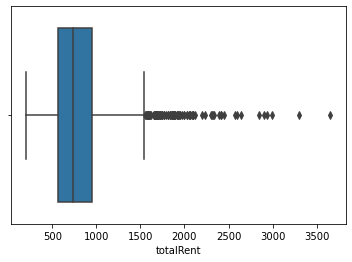

In [11]:
#Here you can get a Boxplot for the wanted city and the wanted column:
searched_city=appartments_only_adjusteddata[appartments_only_adjusteddata["regio2"]== input("Please type in the city name.")]
sns.boxplot(x=searched_city[input("Please type in the column name.")])
plt.show()

##### 2.2. Rankings

In [12]:
#Sorting the Data by a wished column:
Uni4U_Data.sort_values(by=input("Please type in the column by which you want to sort the Data"), ascending=True) 

KeyError: ''

##### 2.3. Correlation

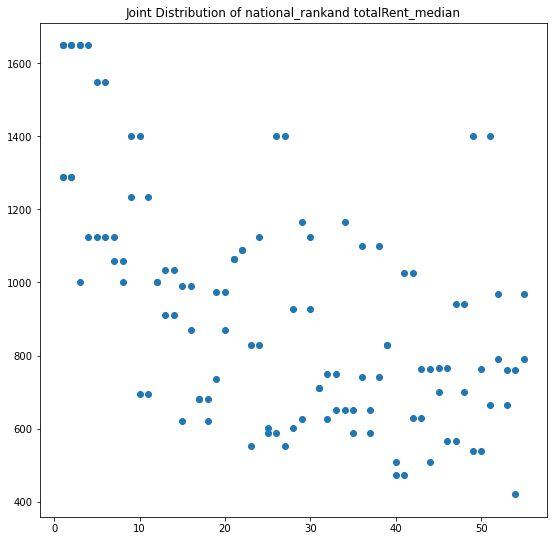

                  national_rank  totalRent_median
national_rank          1.000000         -0.585647
totalRent_median      -0.585647          1.000000


In [ ]:
#Getting a visual correlation and the correlation coefficent for two wished columns:

#First type in the wished columns:
x=input("Please type in the name of the first column (dependent variable)")
y=input("Please type in the name of the second column (independent variable)")

#Second the needed code is executed:
plt.figure(figsize=(20,20))
plt.subplot(2,2,2)

    #The needed Variables are set as dependent and independent:
plt.scatter(x = Uni4U_Data[x], y = Uni4U_Data[y])

    #The Titel of the visual
plt.title("Joint Distribution of "+x+  " and "+y )
plt.show()
print(Uni4U_Data[[x,y]].dropna().corr())